<a href="https://colab.research.google.com/github/NehaKumari500092077/Deep-Learning-Lab/blob/main/Programming%20Assignment%203%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions:

1. The content that you submit must be your individual work.
2. Submit your code in .py as well as in .ipynb file format. Both these file submissions are required to receive credit for this assignment.
3. Ensure your code is well-commented and easy to follow. You can write your answers and explanations using text cells in the jupyter notebook files wherever required.
4. The files should be named as “(roll_number)_assignment_3”. For example, if your roll number is 23AI91R01, the code file names will be 23AI91R01_assignment_3.py and 23AI91R01_assignment_3.ipynb. You should place all these files within a single .zip file (do not upload a .rar file) and upload it to Moodle as 23AI91R01_assignment_3.zip. The zip file should only contain the .py and .ipynb files, and nothing else.
5. All submissions must be made through Moodle before the deadline. The submission portal will close at the specified time, and submissions via email would not be accepted.
6. The .ipynb file acts as your assignment report in addition to the implementation. Therefore, ensure that the .ipynb file is clear and easy to assess. To discourage plagiarism, the .py file is used to check for plagiarism with very strict deduction criteria. Anyone trying to bypass the plagiarism check with means such as gibberish text inside the code will also experience harsh deduction.
7. The primary TA for assignment 3 is Kartik Narayan Sahoo (kartik.sahoo@kgpian.iitkgp.ac.in). In case you have any query regarding the assignment, you can email the TA. Please do not call.

## Question 1 (2 marks)
Load the California housing dataset from scikit-learn.
Split the dataset into training, validation and test sets (70%-15%-15% split)

Standardize the features.

## Question 2 (6 marks)
Design a feedforward neural network from scratch (using just NumPy) with 2 hidden layers. Use ReLU activation for the hidden layers, and a suitable activation for the output layer.
Define a suitable cost function for this problem.

## Question 3 (3 marks)
Using stochastic gradient descent with a suitable learning rate and batch size, train the neural network you implemented. Show the variation of the training and validation losses with training progress.

## Question 4 (3 marks)
Adjust the hidden units of the 2 hidden layers to achieve a good performance on the validation set in terms of reducing the cost function.
Use cross validation to decide the number of hidden units in the 2 hidden layers and report the best number of hidden units that you obtained. Save the model weights for each version of the model (i.e. with different hidden layer sizes) at the end of each training, as well as the best model weights.

## Question 5 (2 marks)
Load the model weights corresponding to the best version of the model and perform prediction on the test set.  
Report the MSE on the test set and show a scatter plot of predictions vs. ground truths on the test set.

Plot the train and validation losses corresponding to the best model weights.

## Question 6 (3 marks)
Design the same model using PyTorch using the values of the best number of hidden units you obtained above as hidden layer sizes and train it. Show the variation of training and validation losses with training progress in this case as well.  

## Question 7 (1 marks)
Report the MSE performance of the model trained with PyTorch the test set and the corresponding prediction vs. ground truth scatter plot. Compare these with your from scratch implementation.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
# Load California Housing Dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [ ]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape y to be a column vector
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

In [ ]:
# add batching
class FeedforwardNN:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.01
        self.b3 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        return self.Z3  # Linear output (no activation for the final layer)

    def compute_loss(self, y_pred, y_true):
        # Mean Squared Error Loss
        return np.mean((y_pred - y_true) ** 2)

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Output layer error
        dZ3 = self.Z3 - y
        dW3 = (1/m) * np.dot(self.A2.T, dZ3)
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

        # Hidden layer 2 error
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        # Hidden layer 1 error
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # Update parameters
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3

    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size=32):
        train_losses = []
        val_losses = []
        for epoch in range(epochs):
            #Shuffle training data
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            train_loss = 0
            for i in range(0, X_train.shape[0], batch_size):
                end_idx = min(i + batch_size, X_train.shape[0])
                X_batch = X_train[i:end_idx]
                y_batch = y_train[i:end_idx]
                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch, learning_rate)
                train_loss += self.compute_loss(y_pred, y_batch)

            avg_train_loss = train_loss/(len(range(0, X_train.shape[0], batch_size)))
            train_losses.append(avg_train_loss)

            # validation
            val_loss = 0
            for i in range(0, X_val.shape[0], batch_size):
                end_idx = min(i + batch_size, X_train.shape[0])
                X_batch = X_train[i:end_idx]
                y_batch = y_train[i:end_idx]
                y_pred = self.forward(X_batch)
                val_loss += self.compute_loss(y_pred, y_batch)

            avg_val_loss = val_loss/(len(range(0, X_val.shape[0], batch_size)))
            val_losses.append(avg_val_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        return train_losses, val_losses

    def predict(self, X):
        return self.forward(X)

In [ ]:
# Set parameters
input_size = X_train.shape[1]  # Number of features
hidden_size1_list = [16, 64, 256]  # Number of neurons in the first hidden layer
hidden_size2_list = [16, 64, 256]   # Number of neurons in the second hidden layer
output_size = 1     # Predicting one continuous value (housing price)

# Train the model
epochs = 100
learning_rate = 0.01
batch_size = 32

best_hidden_size1 = None
best_hidden_size2 = None
best_val_loss = float('inf')
best_weights = {}

# training and saving model weight for different hidden unit configurations
for hidden_size1 in hidden_size1_list:
    for hidden_size2 in hidden_size2_list:
        print(f'Training for config: ({hidden_size1, hidden_size2})')
        model = FeedforwardNN(input_size, hidden_size1, hidden_size2, output_size)
        train_losses, val_losses = model.train(X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size)
        model_weights = {
                "hidden_size1": hidden_size1,
                "hidden_size2": hidden_size2,
                "W1":model.W1,
                "W2":model.W2,
                "W3":model.W3,
                "b1":model.b1,
                "b2":model.b2,
                "b3":model.b3,
                "train_losses": train_losses,
                "val_losses": val_losses
            }
        # save model weights
        np.save(f'model_weights_{hidden_size1}_{hidden_size2}.npy', model_weights)

        if(min(val_losses) < best_val_loss):
            best_val_loss = min(val_losses)
            best_hidden_size1 = hidden_size1
            best_hidden_size2 = hidden_size2
            best_weights = model_weights

            # save best weights
            np.save(f'best_model_weights.npy', best_weights)

print(f'Best hidden units config (1,2): ({best_hidden_size1}, {best_hidden_size2} )')

Training for config: ((16, 16))
Epoch 1/100, Training Loss: 1.8206, Validation Loss: 1.3350
Epoch 11/100, Training Loss: 0.7982, Validation Loss: 0.6274
Epoch 21/100, Training Loss: 0.4325, Validation Loss: 0.4286
Epoch 31/100, Training Loss: 0.3781, Validation Loss: 0.3691
Epoch 41/100, Training Loss: 0.3603, Validation Loss: 0.3389
Epoch 51/100, Training Loss: 0.3539, Validation Loss: 0.3325
Epoch 61/100, Training Loss: 0.3496, Validation Loss: 0.3534
Epoch 71/100, Training Loss: 0.3465, Validation Loss: 0.3399
Epoch 81/100, Training Loss: 0.3419, Validation Loss: 0.3290
Epoch 91/100, Training Loss: 0.3378, Validation Loss: 0.3335
Training for config: ((16, 64))
Epoch 1/100, Training Loss: 1.8096, Validation Loss: 1.3633
Epoch 11/100, Training Loss: 0.4586, Validation Loss: 0.4429
Epoch 21/100, Training Loss: 0.3910, Validation Loss: 0.3947
Epoch 31/100, Training Loss: 0.3669, Validation Loss: 0.3430
Epoch 41/100, Training Loss: 0.3566, Validation Loss: 0.3613
Epoch 51/100, Training 

In [ ]:
# load the model with the best weights/best hidden size config
best_model = FeedforwardNN(input_size, best_hidden_size1, best_hidden_size2, output_size)
best_model.W1 = best_weights["W1"]
best_model.W2 = best_weights["W2"]
best_model.W3 = best_weights["W3"]
best_model.b1 = best_weights["b1"]
best_model.b2 = best_weights["b2"]
best_model.b3 = best_weights["b3"]

train_losses = best_weights["train_losses"]
val_losses = best_weights["val_losses"]

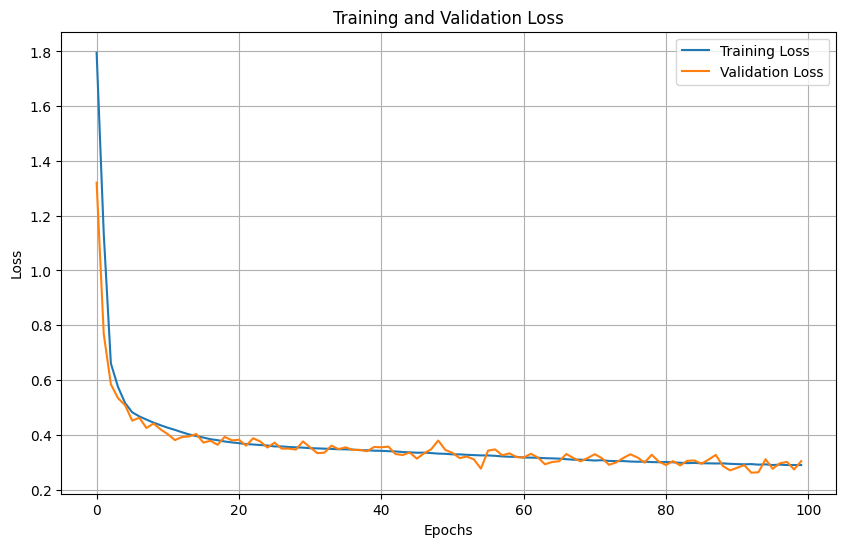

In [ ]:
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(train_losses, val_losses)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the loss on the test set
test_loss = best_model.compute_loss(y_pred, y_test)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.2781


Test Loss: 0.2781


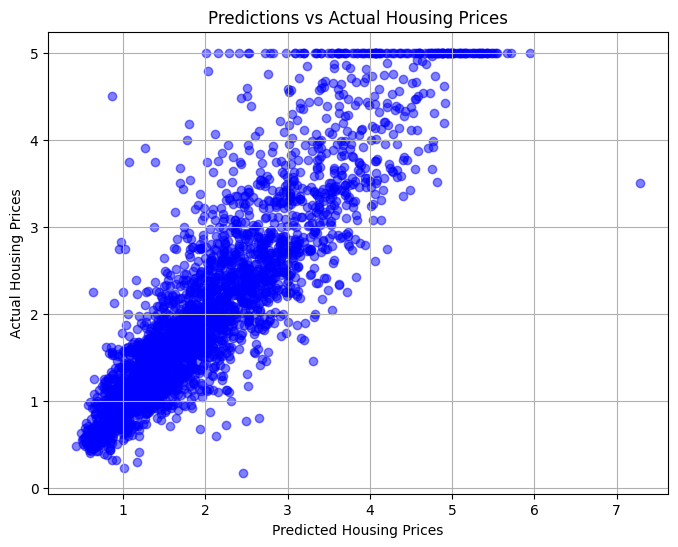

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the loss on the test set
test_loss = best_model.compute_loss(y_pred, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Scatter plot of predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.title("Predictions vs Actual Housing Prices")
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")
plt.grid(True)
plt.show()

# Pytorch Implementation

In [ ]:
#Framework
import torch

#data and its management related libraries
from torch.utils.data import Dataset, DataLoader, TensorDataset

#for creating neural networks
import torch.nn as nn
import torch.nn.functional as F

#for optimising neural networks
import torch.optim as optim

#for metrics and analysis
import sklearn
from torchsummary import summary

# for dataset loading
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device in Use:", device)

Device in Use: cpu


In [ ]:
# Convert to torch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape for consistency in dimensions
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
X_val_torch = torch.tensor(X_val, dtype=torch.float32)
y_val_torch = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

print("\nAfter Converting to Torch Tensor:")
print(X_train_torch.shape, y_train_torch.shape)
print(X_train_torch[:3])
print(y_train_torch[:3])


After Converting to Torch Tensor:
torch.Size([14448, 8]) torch.Size([14448, 1])
tensor([[ 0.1371,  0.5054,  0.1832, -0.2557, -0.1832, -0.0082, -0.7968,  0.7735],
        [-0.5304, -0.6865, -0.4154, -0.0423, -0.3766, -0.1017, -1.3305,  1.2377],
        [ 0.1747, -0.3686,  0.0762, -0.2262, -0.6133, -0.0487, -0.4878, -0.2847]])
tensor([[1.9380],
        [1.6970],
        [2.5980]])


In [ ]:
# Create TensorDatasets for training, testing and validation data
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)

# Define batch size
batch_size = 32

# Create DataLoaders for training, testing and validation data
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class RegressionNet(nn.Module):
    def __init__(self, hidden_size1=64, hidden_size2=32):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], hidden_size1)  # Input layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2) # Hidden layer
        self.fc3 = nn.Linear(hidden_size2, 1)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation after first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after second layer
        x = self.fc3(x)          # No activation function for the final layer
        return x

In [ ]:
def train_pytorch_model(model, learning_rate, trainloader, valloader, epochs=50):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    criterion = nn.MSELoss()
    # optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Lists for saving history
    train_loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        total = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)  # Ensure labels are the correct shape
            optimizer.zero_grad()  # Zeroing the Gradients
            outputs = model(inputs) # Forward Pass
            loss = criterion(outputs, labels) # Computing the Loss
            loss.backward() # Backward Pass
            optimizer.step() # Updating the Model Parameters
            running_loss += loss.item()

        train_loss = running_loss / len(trainloader)
        train_loss_history.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(valloader)
        val_loss_history.append(val_loss)

        if epoch%10==0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    return train_loss_history, val_loss_history

In [ ]:
# Initialize the model
net = RegressionNet(hidden_size1=best_hidden_size1, hidden_size2=best_hidden_size2)
net = net.to(device)
# Define learning rates to test
learning_rates = [0.01]
epochs = 100

# Placeholder for results
results = {}

# Train the model with different learning rates and store the results
for lr in learning_rates:
    print(f'Training with learning rate: {lr}')
    train_loss, val_loss = train_pytorch_model(net, lr, trainloader, valloader, epochs)
    results[lr] = {
        'train_loss': train_loss,
        'val_loss': val_loss
        }

Training with learning rate: 0.01
Epoch [1/100], Train Loss: 1.7051, Validation Loss: 0.5617
Epoch [11/100], Train Loss: 0.3328, Validation Loss: 0.3464
Epoch [21/100], Train Loss: 0.2950, Validation Loss: 0.3199
Epoch [31/100], Train Loss: 0.2775, Validation Loss: 0.3062
Epoch [41/100], Train Loss: 0.2660, Validation Loss: 0.3061
Epoch [51/100], Train Loss: 0.2596, Validation Loss: 0.3196
Epoch [61/100], Train Loss: 0.2522, Validation Loss: 0.2993
Epoch [71/100], Train Loss: 0.2486, Validation Loss: 0.3021
Epoch [81/100], Train Loss: 0.2427, Validation Loss: 0.3092
Epoch [91/100], Train Loss: 0.2378, Validation Loss: 0.3005


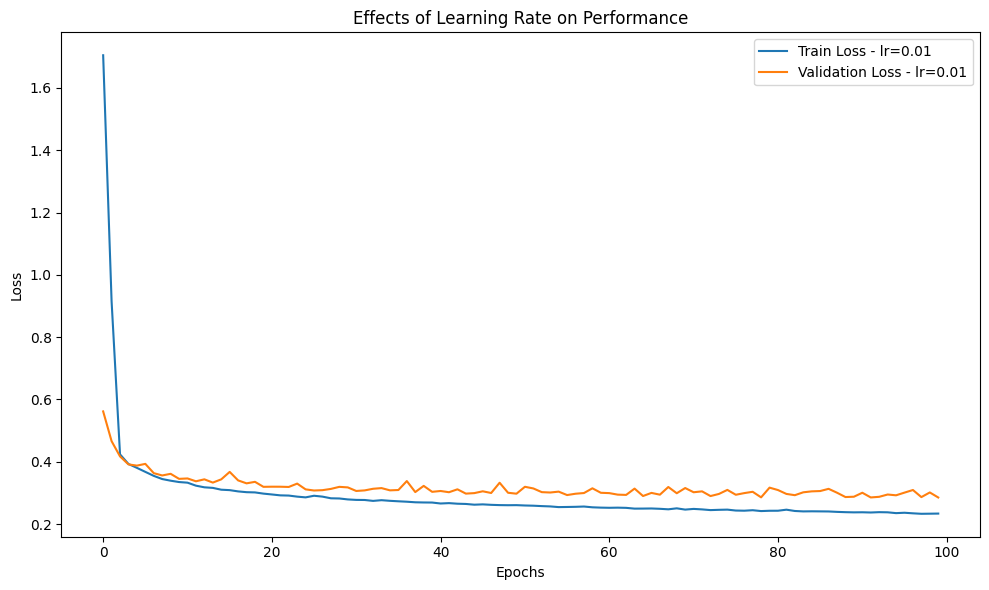

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.title('Effects of Learning Rate on Performance')

for lr, result in results.items():
    plt.plot(result['train_loss'], label=f'Train Loss - lr={lr}')
    plt.plot(result['val_loss'], label=f'Validation Loss - lr={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Test Loss: 0.2514


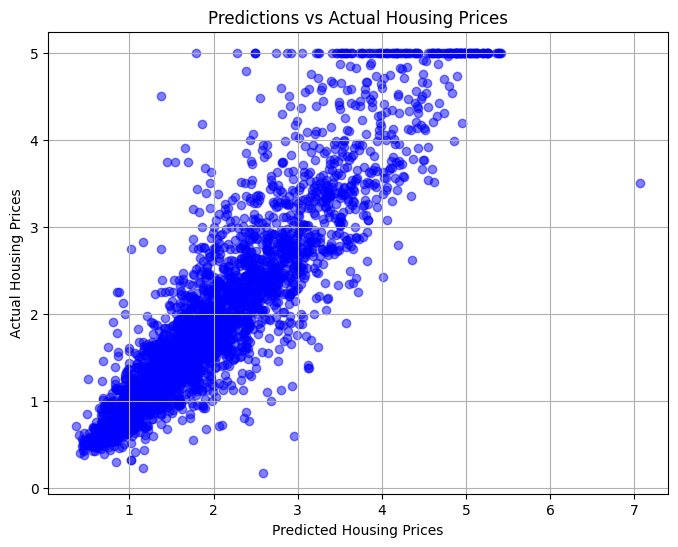

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
with torch.no_grad():
    y_pred = net(X_test_torch)

# Compute the loss on the test set
criterion = nn.MSELoss()
test_loss = criterion(y_pred, y_test_torch)
print(f"Test Loss: {test_loss:.4f}")

# Scatter plot of predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred.numpy(), y_test_torch.numpy(), color='blue', alpha=0.5)
plt.title("Predictions vs Actual Housing Prices")
plt.xlabel("Predicted Housing Prices")
plt.ylabel("Actual Housing Prices")
plt.grid(True)
plt.show()